In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.core import Flatten, Dense, Activation, Reshape

from utils import load_weights, Box, yolo_net_out_to_car_boxes, draw_box

Using TensorFlow backend.


### Set the following path to your working directory for this project

In [2]:
WorkingDir = '/media/feliz/Safira/GitHub/GridKey/Car Detection/'

###  Constructing the tiny-yolo model

In [3]:
keras.backend.set_image_dim_ordering('th')

In [4]:
model = Sequential()
model.add(Convolution2D(16, 3, 3,input_shape=(3,448,448),border_mode='same',subsample=(1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))
model.add(Convolution2D(64,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))
model.add(Convolution2D(128,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))
model.add(Convolution2D(256,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))
model.add(Convolution2D(512,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))
model.add(Convolution2D(1024,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Convolution2D(1024,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Convolution2D(1024,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(4096))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1470))

# model.summary()

### Loading the weights  

In [5]:
load_weights(model,WorkingDir+'tiny-yolo.weights')

## Applying the model on images

###### Single Image

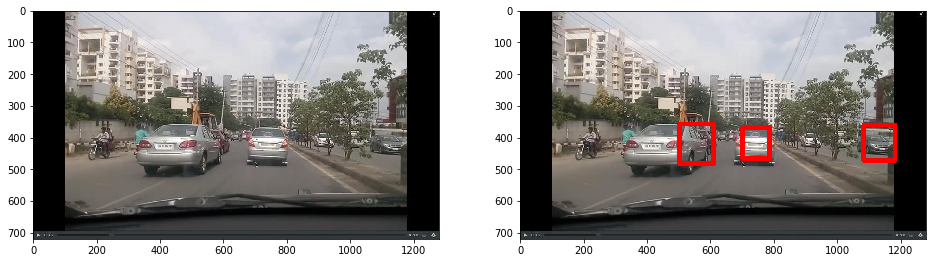

In [8]:
imagePath = WorkingDir+'Testing/Images/002.jpg'
image = plt.imread(imagePath)
image_crop = image[300:650,500:,:]
resized = cv2.resize(image_crop,(448,448))
batch = np.transpose(resized,(2,0,1))
batch = 2*(batch/255.) - 1
batch = np.expand_dims(batch, axis=0)
out = model.predict(batch)
boxes = yolo_net_out_to_car_boxes(out[0], threshold = 0.17)
f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
ax1.imshow(image)
ax2.imshow(draw_box(boxes,plt.imread(imagePath),[[500,1280],[300,650]]))

###### Multiple Image

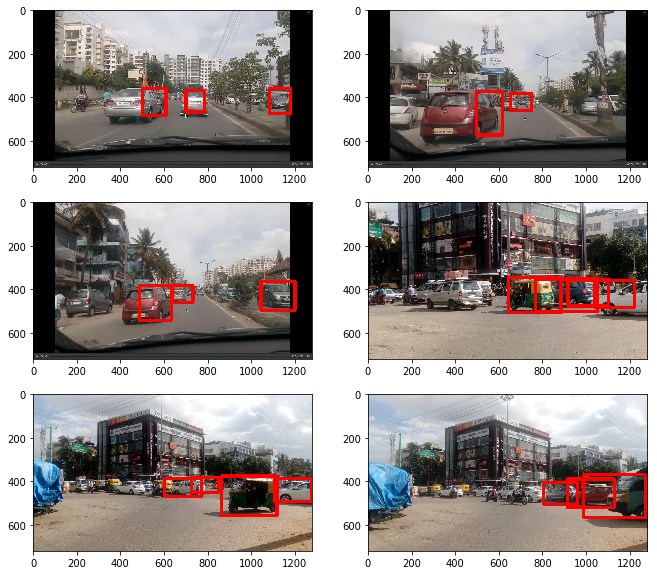

In [9]:
images = [plt.imread(file) for file in glob.glob(WorkingDir+'Testing/Images/*.jpg')]
batch = np.array([np.transpose(cv2.resize(image[300:650,500:,:],(448,448)),(2,0,1)) 
                  for image in images])
batch = 2*(batch/255.) - 1
out = model.predict(batch)
f,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(11,10))
for i,ax in zip(range(len(batch)),[ax1,ax2,ax3,ax4,ax5,ax6]):
    boxes = yolo_net_out_to_car_boxes(out[i], threshold = 0.17)
    ax.imshow(draw_box(boxes,images[i],[[500,1280],[300,650]]))

## Applying the model on Video

In [11]:
def frame_func(image):
    crop = image[300:650,500:,:]
    resized = cv2.resize(crop,(448,448))
    batch = np.array([resized[:,:,0],resized[:,:,1],resized[:,:,2]])
    batch = 2*(batch/255.) - 1
    batch = np.expand_dims(batch, axis=0)
    out = model.predict(batch)
    boxes = yolo_net_out_to_car_boxes(out[0], threshold = 0.17)
    return draw_box(boxes,image,[[500,1280],[300,650]])

In [14]:
project_video_output = WorkingDir+'Output/Videos/output-4.mp4'
clip1 = VideoFileClip(WorkingDir+'Testing/Videos/4.mp4')

In [ ]:
lane_clip = clip1.fl_image(frame_func)
%time lane_clip.write_videofile(project_video_output, audio=False)

[MoviePy] >>>> Building video /media/feliz/Safira/GitHub/GridKey/Car Detection/Output/Videos/output-4.mp4
[MoviePy] Writing video /media/feliz/Safira/GitHub/GridKey/Car Detection/Output/Videos/output-4.mp4




  0%|          | 0/1480 [00:00<?, ?it/s]

  0%|          | 1/1480 [00:01<33:41,  1.37s/it]

  0%|          | 2/1480 [00:02<33:44,  1.37s/it]

  0%|          | 3/1480 [00:04<33:45,  1.37s/it]

  0%|          | 4/1480 [00:05<33:46,  1.37s/it]

  0%|          | 5/1480 [00:06<33:48,  1.38s/it]

  0%|          | 6/1480 [00:08<33:44,  1.37s/it]

  0%|          | 7/1480 [00:09<33:50,  1.38s/it]

  1%|          | 8/1480 [00:11<33:43,  1.37s/it]

  1%|          | 9/1480 [00:12<33:41,  1.37s/it]

  1%|          | 10/1480 [00:13<33:40,  1.37s/it]

  1%|          | 11/1480 [00:15<33:37,  1.37s/it]

  1%|          | 12/1480 [00:16<33:39,  1.38s/it]

  1%|          | 13/1480 [00:17<33:35,  1.37s/it]

  1%|          | 14/1480 [00:19<33:30,  1.37s/it]

  1%|          | 15/1480 [00:20<33:32,  1.37s/it]

  1%|          | 16/1480 [00:21<33:23,  1.37s/it]

  1%|          | 17/1480 [00:23<33:25,  1.37s/it]

  1%|          | 18/1480 [00:24<33:26,  1.37s/it]

  1%|▏         | 19/1480 [00:26<33:21,  1.37s/i

 10%|▉         | 143/1480 [03:21<31:48,  1.43s/it]

 10%|▉         | 144/1480 [03:23<31:48,  1.43s/it]

 10%|▉         | 145/1480 [03:24<31:37,  1.42s/it]

 10%|▉         | 146/1480 [03:26<31:31,  1.42s/it]

 10%|▉         | 147/1480 [03:27<31:39,  1.42s/it]

 10%|█         | 148/1480 [03:29<31:31,  1.42s/it]

 10%|█         | 149/1480 [03:30<31:36,  1.42s/it]

 10%|█         | 150/1480 [03:31<31:49,  1.44s/it]

 10%|█         | 151/1480 [03:33<31:45,  1.43s/it]

 10%|█         | 152/1480 [03:34<31:38,  1.43s/it]

 10%|█         | 153/1480 [03:36<31:26,  1.42s/it]

 10%|█         | 154/1480 [03:37<31:28,  1.42s/it]

 10%|█         | 155/1480 [03:39<31:16,  1.42s/it]

 11%|█         | 156/1480 [03:40<31:13,  1.42s/it]

 11%|█         | 157/1480 [03:41<31:04,  1.41s/it]

 11%|█         | 158/1480 [03:43<31:05,  1.41s/it]

 11%|█         | 159/1480 [03:44<31:00,  1.41s/it]

 11%|█         | 160/1480 [03:46<30:59,  1.41s/it]

 11%|█         | 161/1480 [03:47<30:50,  1.40s/it]

 11%|█      

 19%|█▉        | 284/1480 [06:43<28:08,  1.41s/it]

 19%|█▉        | 285/1480 [06:44<28:11,  1.42s/it]

 19%|█▉        | 286/1480 [06:46<28:46,  1.45s/it]

 19%|█▉        | 287/1480 [06:47<28:34,  1.44s/it]

 19%|█▉        | 288/1480 [06:49<28:34,  1.44s/it]

 20%|█▉        | 289/1480 [06:50<28:25,  1.43s/it]

 20%|█▉        | 290/1480 [06:51<28:14,  1.42s/it]

 20%|█▉        | 291/1480 [06:53<28:08,  1.42s/it]

 20%|█▉        | 292/1480 [06:54<28:23,  1.43s/it]

 20%|█▉        | 293/1480 [06:56<28:21,  1.43s/it]

 20%|█▉        | 294/1480 [06:57<28:27,  1.44s/it]

 20%|█▉        | 295/1480 [06:59<28:09,  1.43s/it]

 20%|██        | 296/1480 [07:00<28:02,  1.42s/it]

 20%|██        | 297/1480 [07:01<27:48,  1.41s/it]

 20%|██        | 298/1480 [07:03<27:42,  1.41s/it]

 20%|██        | 299/1480 [07:04<27:38,  1.40s/it]

 20%|██        | 300/1480 [07:06<27:35,  1.40s/it]

 20%|██        | 301/1480 [07:07<27:39,  1.41s/it]

 20%|██        | 302/1480 [07:08<27:42,  1.41s/it]

 20%|██     

 29%|██▊       | 425/1480 [10:04<25:12,  1.43s/it]

 29%|██▉       | 426/1480 [10:05<25:19,  1.44s/it]

 29%|██▉       | 427/1480 [10:07<25:03,  1.43s/it]

 29%|██▉       | 428/1480 [10:08<24:58,  1.42s/it]

 29%|██▉       | 429/1480 [10:09<24:45,  1.41s/it]

 29%|██▉       | 430/1480 [10:11<24:42,  1.41s/it]

 29%|██▉       | 431/1480 [10:12<24:35,  1.41s/it]

 29%|██▉       | 432/1480 [10:14<24:35,  1.41s/it]

 29%|██▉       | 433/1480 [10:15<24:36,  1.41s/it]

 29%|██▉       | 434/1480 [10:16<24:35,  1.41s/it]

 29%|██▉       | 435/1480 [10:18<24:27,  1.40s/it]

 29%|██▉       | 436/1480 [10:19<24:32,  1.41s/it]

 30%|██▉       | 437/1480 [10:21<24:23,  1.40s/it]

 30%|██▉       | 438/1480 [10:22<24:25,  1.41s/it]

 30%|██▉       | 439/1480 [10:23<24:17,  1.40s/it]

 30%|██▉       | 440/1480 [10:25<24:19,  1.40s/it]

 30%|██▉       | 441/1480 [10:26<24:33,  1.42s/it]

 30%|██▉       | 442/1480 [10:28<24:44,  1.43s/it]

 30%|██▉       | 443/1480 [10:29<25:23,  1.47s/it]

 30%|███    

 38%|███▊      | 566/1480 [13:29<21:50,  1.43s/it]

 38%|███▊      | 567/1480 [13:30<21:59,  1.44s/it]

 38%|███▊      | 568/1480 [13:32<21:55,  1.44s/it]

 38%|███▊      | 569/1480 [13:33<21:43,  1.43s/it]

 39%|███▊      | 570/1480 [13:35<21:39,  1.43s/it]

 39%|███▊      | 571/1480 [13:36<21:30,  1.42s/it]

 39%|███▊      | 572/1480 [13:37<21:30,  1.42s/it]

 39%|███▊      | 573/1480 [13:39<21:25,  1.42s/it]

 39%|███▉      | 574/1480 [13:40<21:24,  1.42s/it]

 39%|███▉      | 575/1480 [13:42<21:20,  1.41s/it]

 39%|███▉      | 576/1480 [13:43<21:22,  1.42s/it]

 39%|███▉      | 577/1480 [13:44<21:19,  1.42s/it]

 39%|███▉      | 578/1480 [13:46<21:17,  1.42s/it]

 39%|███▉      | 579/1480 [13:47<21:17,  1.42s/it]

 39%|███▉      | 580/1480 [13:49<21:25,  1.43s/it]

 39%|███▉      | 581/1480 [13:50<21:30,  1.43s/it]

 39%|███▉      | 582/1480 [13:52<21:33,  1.44s/it]

 39%|███▉      | 583/1480 [13:53<21:25,  1.43s/it]

 39%|███▉      | 584/1480 [13:54<21:21,  1.43s/it]

 40%|███▉   

 48%|████▊     | 707/1480 [16:51<18:23,  1.43s/it]

 48%|████▊     | 708/1480 [16:52<18:23,  1.43s/it]

 48%|████▊     | 709/1480 [16:53<18:12,  1.42s/it]

 48%|████▊     | 710/1480 [16:55<18:09,  1.41s/it]

 48%|████▊     | 711/1480 [16:56<18:05,  1.41s/it]

 48%|████▊     | 712/1480 [16:58<18:05,  1.41s/it]

 48%|████▊     | 713/1480 [16:59<18:02,  1.41s/it]

 48%|████▊     | 714/1480 [17:00<18:02,  1.41s/it]

 48%|████▊     | 715/1480 [17:02<17:57,  1.41s/it]

 48%|████▊     | 716/1480 [17:03<18:01,  1.42s/it]

 48%|████▊     | 717/1480 [17:05<17:56,  1.41s/it]

 49%|████▊     | 718/1480 [17:06<17:56,  1.41s/it]

 49%|████▊     | 719/1480 [17:07<17:54,  1.41s/it]

 49%|████▊     | 720/1480 [17:09<18:05,  1.43s/it]

 49%|████▊     | 721/1480 [17:10<18:11,  1.44s/it]

 49%|████▉     | 722/1480 [17:12<18:12,  1.44s/it]

 49%|████▉     | 723/1480 [17:13<18:02,  1.43s/it]

 49%|████▉     | 724/1480 [17:15<17:57,  1.43s/it]

 49%|████▉     | 725/1480 [17:16<17:52,  1.42s/it]

 49%|████▉  

 57%|█████▋    | 848/1480 [20:10<14:58,  1.42s/it]

 57%|█████▋    | 849/1480 [20:12<14:56,  1.42s/it]

 57%|█████▋    | 850/1480 [20:13<14:58,  1.43s/it]

 57%|█████▊    | 851/1480 [20:15<14:52,  1.42s/it]

 58%|█████▊    | 852/1480 [20:16<14:48,  1.41s/it]

 58%|█████▊    | 853/1480 [20:17<14:46,  1.41s/it]

 58%|█████▊    | 854/1480 [20:19<14:43,  1.41s/it]

 58%|█████▊    | 855/1480 [20:20<14:39,  1.41s/it]

 58%|█████▊    | 856/1480 [20:22<14:36,  1.40s/it]

 58%|█████▊    | 857/1480 [20:23<14:42,  1.42s/it]

 58%|█████▊    | 858/1480 [20:24<14:37,  1.41s/it]

 58%|█████▊    | 859/1480 [20:26<14:37,  1.41s/it]

 58%|█████▊    | 860/1480 [20:27<14:34,  1.41s/it]

 58%|█████▊    | 861/1480 [20:29<14:34,  1.41s/it]

 58%|█████▊    | 862/1480 [20:30<14:30,  1.41s/it]

 58%|█████▊    | 863/1480 [20:31<14:27,  1.41s/it]

 58%|█████▊    | 864/1480 [20:33<14:30,  1.41s/it]

 58%|█████▊    | 865/1480 [20:34<14:27,  1.41s/it]

 59%|█████▊    | 866/1480 [20:36<14:26,  1.41s/it]

 59%|█████▊ 

 67%|██████▋   | 989/1480 [23:30<11:39,  1.42s/it]

 67%|██████▋   | 990/1480 [23:31<11:39,  1.43s/it]

 67%|██████▋   | 991/1480 [23:33<11:33,  1.42s/it]

 67%|██████▋   | 992/1480 [23:34<11:31,  1.42s/it]

 67%|██████▋   | 993/1480 [23:36<11:30,  1.42s/it]

 67%|██████▋   | 994/1480 [23:37<11:28,  1.42s/it]

 67%|██████▋   | 995/1480 [23:38<11:26,  1.41s/it]

 67%|██████▋   | 996/1480 [23:40<11:25,  1.42s/it]

 67%|██████▋   | 997/1480 [23:41<11:23,  1.42s/it]

 67%|██████▋   | 998/1480 [23:43<11:20,  1.41s/it]

 68%|██████▊   | 999/1480 [23:44<11:20,  1.41s/it]

 68%|██████▊   | 1000/1480 [23:46<11:17,  1.41s/it]

 68%|██████▊   | 1001/1480 [23:47<11:14,  1.41s/it]

 68%|██████▊   | 1002/1480 [23:48<11:15,  1.41s/it]

 68%|██████▊   | 1003/1480 [23:50<11:11,  1.41s/it]

 68%|██████▊   | 1004/1480 [23:51<11:11,  1.41s/it]

 68%|██████▊   | 1005/1480 [23:53<11:07,  1.41s/it]

 68%|██████▊   | 1006/1480 [23:54<11:10,  1.41s/it]

 68%|██████▊   | 1007/1480 [23:55<11:06,  1.41s/it]

 68%

 76%|███████▌  | 1128/1480 [26:46<08:29,  1.45s/it]

 76%|███████▋  | 1129/1480 [26:48<08:28,  1.45s/it]

 76%|███████▋  | 1130/1480 [26:49<08:23,  1.44s/it]

 76%|███████▋  | 1131/1480 [26:51<08:16,  1.42s/it]

 76%|███████▋  | 1132/1480 [26:52<08:14,  1.42s/it]

 77%|███████▋  | 1133/1480 [26:53<08:10,  1.41s/it]

 77%|███████▋  | 1134/1480 [26:55<08:10,  1.42s/it]

 77%|███████▋  | 1135/1480 [26:56<08:07,  1.41s/it]

 77%|███████▋  | 1136/1480 [26:58<08:05,  1.41s/it]

 77%|███████▋  | 1137/1480 [26:59<08:01,  1.40s/it]

 77%|███████▋  | 1138/1480 [27:00<08:01,  1.41s/it]

 77%|███████▋  | 1139/1480 [27:02<07:58,  1.40s/it]

 77%|███████▋  | 1140/1480 [27:03<07:58,  1.41s/it]

 77%|███████▋  | 1141/1480 [27:05<07:54,  1.40s/it]

 77%|███████▋  | 1142/1480 [27:06<07:53,  1.40s/it]

 77%|███████▋  | 1143/1480 [27:07<07:51,  1.40s/it]

 77%|███████▋  | 1144/1480 [27:09<07:50,  1.40s/it]

 77%|███████▋  | 1145/1480 [27:10<07:49,  1.40s/it]

 77%|███████▋  | 1146/1480 [27:12<07:49,  1.40

 86%|████████▌ | 1266/1480 [30:24<07:18,  2.05s/it]

 86%|████████▌ | 1267/1480 [30:26<07:05,  2.00s/it]

 86%|████████▌ | 1268/1480 [30:28<07:34,  2.14s/it]

 86%|████████▌ | 1269/1480 [30:30<07:39,  2.18s/it]

 86%|████████▌ | 1270/1480 [30:33<07:45,  2.22s/it]

 86%|████████▌ | 1271/1480 [30:35<07:25,  2.13s/it]

 86%|████████▌ | 1272/1480 [30:37<07:45,  2.24s/it]

 86%|████████▌ | 1273/1480 [30:40<08:00,  2.32s/it]

 86%|████████▌ | 1274/1480 [30:42<08:01,  2.34s/it]

 86%|████████▌ | 1275/1480 [30:44<07:30,  2.20s/it]

 86%|████████▌ | 1276/1480 [30:46<07:07,  2.10s/it]

 86%|████████▋ | 1277/1480 [30:47<06:41,  1.98s/it]

 86%|████████▋ | 1278/1480 [30:49<06:18,  1.87s/it]

 86%|████████▋ | 1279/1480 [30:51<06:04,  1.81s/it]

 86%|████████▋ | 1280/1480 [30:52<05:42,  1.71s/it]

 87%|████████▋ | 1281/1480 [30:54<05:21,  1.61s/it]

 87%|████████▋ | 1282/1480 [30:55<05:13,  1.58s/it]

 87%|████████▋ | 1283/1480 [30:57<05:17,  1.61s/it]

 87%|████████▋ | 1284/1480 [30:58<05:13,  1.60